In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
matches_raw_df = pd.read_csv('E:\ODI_Cricket_dataset\ODI_Cricket_dataset\ContinousDataset.csv')


In [5]:
matches_raw_df

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,3747,ODI # 3931,New Zealand,India,Winner2ndInning,Pune,"Oct 25, 2017",India,India,Away,Home,First,Second
7490,3748,ODI # 3932,New Zealand,India,Winner1stInning,Kanpur,"Oct 29, 2017",India,India,Away,Home,Second,First
7491,3749,ODI # 3933,Namibia,Hong Kong,Winner2ndInning,Mumbai,"Aug 12, 2017",Namibia,India,Neutral,Neutral,Second,First
7492,3750,ODI # 3934,U.S.A.,Bermuda,Winner2ndInning,Mumbai,"Aug 12, 2017",U.S.A.,India,Neutral,Neutral,Second,First


In [6]:
matches_raw_df.shape


(7494, 13)

In [7]:
matches_raw_df.columns


Index(['Unnamed: 0', 'Scorecard', 'Team 1', 'Team 2', 'Margin', 'Ground',
       'Match Date', 'Winner', 'Host_Country', 'Venue_Team1', 'Venue_Team2',
       'Innings_Team1', 'Innings_Team2'],
      dtype='object')

In [8]:
matches_raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7494 entries, 0 to 7493
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     7494 non-null   int64 
 1   Scorecard      7494 non-null   object
 2   Team 1         7494 non-null   object
 3   Team 2         7494 non-null   object
 4   Margin         7494 non-null   object
 5   Ground         7494 non-null   object
 6   Match Date     7494 non-null   object
 7   Winner         7494 non-null   object
 8   Host_Country   7364 non-null   object
 9   Venue_Team1    7494 non-null   object
 10  Venue_Team2    7494 non-null   object
 11  Innings_Team1  7494 non-null   object
 12  Innings_Team2  7494 non-null   object
dtypes: int64(1), object(12)
memory usage: 761.2+ KB


In [9]:
matches_raw_df.Winner.value_counts()


Australia       1104
India            950
Pakistan         932
West Indies      760
Sri Lanka        742
South Africa     722
England          686
New Zealand      648
Zimbabwe         258
Bangladesh       210
Ireland          102
Kenya             84
Afghanistan       84
Scotland          62
Netherlands       56
Canada            34
U.A.E.            18
Bermuda           14
Hong Kong         12
P.N.G.            10
Namibia            2
U.S.A.             2
East Africa        2
Name: Winner, dtype: int64

In [10]:
unique_teams = matches_raw_df["Winner"].unique()
print(unique_teams)

['Australia' 'England' 'New Zealand' 'West Indies' 'Pakistan' 'India'
 'Sri Lanka' 'Zimbabwe' 'South Africa' 'Kenya' 'U.A.E.' 'Bangladesh'
 'Canada' 'Netherlands' 'Bermuda' 'Ireland' 'Scotland' 'Afghanistan'
 'P.N.G.' 'Hong Kong' 'Namibia' 'U.S.A.' 'East Africa']


In [11]:
len(unique_teams)

23

In [12]:
x,y = matches_raw_df.shape
winner_count = matches_raw_df.loc[:,["Winner","Scorecard"]].groupby("Winner").count()
winner_count["Percentage"] = round(winner_count["Scorecard"]*100/x,0);
winner_count = winner_count.sort_values("Scorecard",ascending=False)
winner_count

,Scorecard,Percentage
Winner,,
Australia,1104,15.0
India,950,13.0
Pakistan,932,12.0
West Indies,760,10.0
Sri Lanka,742,10.0
South Africa,722,10.0
England,686,9.0
New Zealand,648,9.0
Zimbabwe,258,3.0


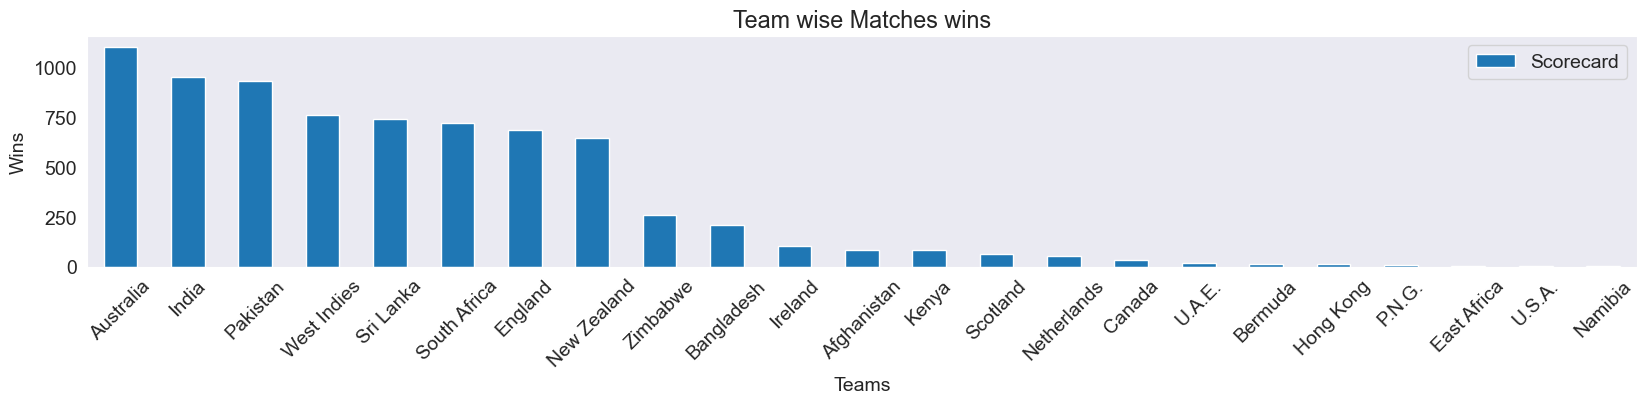

In [14]:
winner_count.iloc[:,0:1].plot(kind="bar",figsize=(20,3))
plt.xticks(rotation=45)
plt.xlabel("Teams")
plt.ylabel("Wins")
plt.title("Team wise Matches wins")
plt.grid()
plt.show()

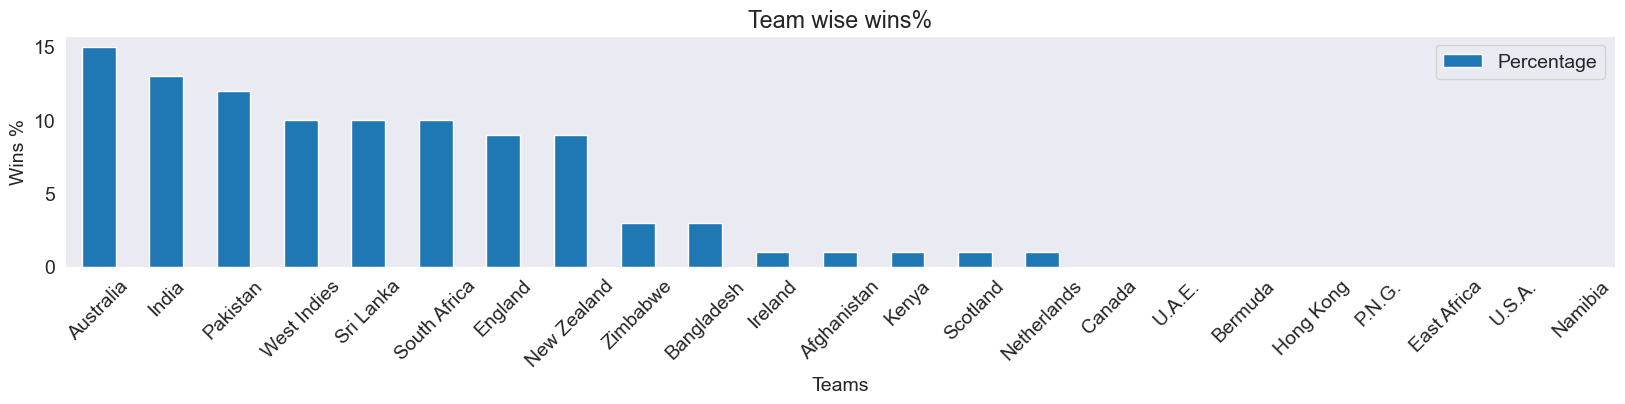

In [15]:
winner_count.iloc[:,1:2].plot(kind="bar",figsize=(20,3))
plt.xticks(rotation=45)
plt.xlabel("Teams")
plt.ylabel("Wins %")
plt.title("Team wise wins%")
plt.grid()
plt.show()

In [16]:
#Defined the Dataframe
team_wise_matches_info = pd.DataFrame(columns=["TeamName","MatchesPlayed","MatchesWon","WonPercentage","LossPercentage","Total_Home_Played","Total_Home_Wins","Home_Wins%","Home_Innings_1st_1st","Home_Innings_1st_2nd","Home_Innings_2nd_1st","Home_Innings_2nd_2nd","Total_Away_Played","Total_Away_Wins","Away_Wins%","Away_Innings_1st_1st","Away_Innings_1st_2nd","Away_Innings_2nd_1st","Away_Innings_2nd_2nd"])

In [17]:
#Defined the team_statistics function to calculate the team wise statistics and map those statistics to Data Frame
def team_statistics(team,i):
    #Calculating the total matches played by a team
    total_matches_played = matches_raw_df[(matches_raw_df["Team 1"] == team) | (matches_raw_df["Team 2"] == team)]
    total_matches_played_rows,total_matches_played_columns = total_matches_played.shape
    
    #Calculating the total matches won by a team
    total_matches_won = matches_raw_df[((matches_raw_df["Team 1"] == team) | (matches_raw_df["Team 2"] == team)) & (matches_raw_df["Winner"] == team)]
    total_matches_won_rows, total_matches_won_columns = total_matches_won.shape
    
    #Calculating the total matches played by a team at Home Country
    total_home_played = matches_raw_df[((matches_raw_df["Team 1"] == team) | (matches_raw_df["Team 2"] == team)) & (matches_raw_df["Host_Country"] == team)]
    total_home_played_rows, total_home_played_columns = total_home_played.shape
    
    #Calculating the total matches won by a team at Home Country
    team_home_won = matches_raw_df[((matches_raw_df["Team 1"] == team) | (matches_raw_df["Team 2"] == team)) & (matches_raw_df["Winner"] == team) & (matches_raw_df["Host_Country"] == team)]
    team_home_won_rows,team_home_won_columns = team_home_won.shape
    
    #Calculating the total matches won by a team1 in First Innings at Home Country 
    team_home_innings1_1st_country_won = matches_raw_df[(matches_raw_df["Team 1"] == team) & (matches_raw_df["Winner"] == team) & (matches_raw_df["Host_Country"] == team) & (matches_raw_df["Innings_Team1"] == "First")]
    team_home_innings1_1st_country_won_rows,team_home_innings1_1st_country_won_columns = team_home_innings1_1st_country_won.shape
    
    #Calculating the total matches won by a team1 in Second Innings at Home Country 
    team_home_innings1_2nd_country_won = matches_raw_df[(matches_raw_df["Team 1"] == team) & (matches_raw_df["Winner"] == team) & (matches_raw_df["Host_Country"] == team) & (matches_raw_df["Innings_Team1"] == "Second")]
    team_home_innings1_2nd_country_won_rows,team_home_innings1_2nd_country_won_columns = team_home_innings1_2nd_country_won.shape
  
    #Calculating the total matches won by a team2 in First Innings at Home Country 
    team_home_innings2_1st_country_won = matches_raw_df[(matches_raw_df["Team 2"] == team) & (matches_raw_df["Winner"] == team) & (matches_raw_df["Host_Country"] == team) & (matches_raw_df["Innings_Team2"] == "First")]
    team_home_innings2_1st_country_won_rows,team_home_innings2_1st_country_won_columns = team_home_innings2_1st_country_won.shape
    
    #Calculating the total matches won by a team2 in Second Innings at Home Country 
    team_home_innings2_2nd_country_won = matches_raw_df[(matches_raw_df["Team 2"] == team) & (matches_raw_df["Winner"] == team) & (matches_raw_df["Host_Country"] == team) & (matches_raw_df["Innings_Team2"] == "Second")]
    team_home_innings2_2nd_country_won_rows,team_home_innings2_2nd_country_won_columns = team_home_innings2_2nd_country_won.shape
   
    #Calculating the total matches played by a team at Away Country
    total_away_played = matches_raw_df[((matches_raw_df["Team 1"] == team) | (matches_raw_df["Team 2"] == team)) & (matches_raw_df["Host_Country"] != team)]
    total_away_played_rows, total_away_played_columns = total_away_played.shape
    
    #Calculating the total matches won by a team at Away Country
    team_away_won = matches_raw_df[((matches_raw_df["Team 1"] == team) | (matches_raw_df["Team 2"] == team)) & (matches_raw_df["Winner"] == team) & (matches_raw_df["Host_Country"] != team)]
    team_away_won_rows,team_away_won_columns = team_away_won.shape
    
    #Calculating the total matches won by a team1 in First Innings at Away Country
    team_away_innings1_1st_country_won = matches_raw_df[(matches_raw_df["Team 1"] == team) & (matches_raw_df["Winner"] == team) & (matches_raw_df["Host_Country"] != team) & (matches_raw_df["Innings_Team1"] == "First")]
    team_away_innings1_1st_country_won_rows,team_away_innings1_1st_country_won_columns = team_away_innings1_1st_country_won.shape
   
    #Calculating the total matches won by a team1 in Second Innings at Away Country 
    team_away_innings1_2nd_country_won = matches_raw_df[(matches_raw_df["Team 1"] == team) & (matches_raw_df["Winner"] == team) & (matches_raw_df["Host_Country"] != team) & (matches_raw_df["Innings_Team1"] == "Second")]
    team_away_innings1_2nd_country_won_rows,team_away_innings1_2nd_country_won_columns = team_away_innings1_2nd_country_won.shape
    
    #Calculating the total matches won by a team2 in First Innings at Away Country 
    team_away_innings2_1st_country_won = matches_raw_df[(matches_raw_df["Team 2"] == team) & (matches_raw_df["Winner"] == team) & (matches_raw_df["Host_Country"] != team) & (matches_raw_df["Innings_Team2"] == "First")]
    team_away_innings2_1st_country_won_rows,team_away_innings2_1st_country_won_columns = team_away_innings2_1st_country_won.shape
    
    #Calculating the total matches won by a team2 in Second Innings at Away Country 
    team_away_innings2_2nd_country_won = matches_raw_df[(matches_raw_df["Team 2"] == team) & (matches_raw_df["Winner"] == team) & (matches_raw_df["Host_Country"] != team) & (matches_raw_df["Innings_Team2"] == "Second")]
    team_away_innings2_2nd_country_won_rows,team_away_innings2_2nd_country_won_columns = team_away_innings2_2nd_country_won.shape
        
    team_wise_matches_info.at[i,"TeamName"] = team
    team_wise_matches_info.at[i,"MatchesPlayed"] = total_matches_played_rows
    team_wise_matches_info.at[i,"MatchesWon"] = total_matches_won_rows
    team_wise_matches_info.at[i,"WonPercentage"] = round(total_matches_won_rows*100/total_matches_played_rows,2)
    team_wise_matches_info.at[i,"LossPercentage"] = 100-round(total_matches_won_rows*100/total_matches_played_rows,2)
    team_wise_matches_info.at[i,"Total_Home_Played"] = total_home_played_rows
    team_wise_matches_info.at[i,"Total_Home_Wins"] = team_home_won_rows
    team_wise_matches_info.at[i,"Home_Innings_1st_1st"] = team_home_innings1_1st_country_won_rows
    team_wise_matches_info.at[i,"Home_Innings_1st_2nd"] = team_home_innings1_2nd_country_won_rows
    team_wise_matches_info.at[i,"Home_Innings_2nd_1st"] = team_home_innings2_1st_country_won_rows
    team_wise_matches_info.at[i,"Home_Innings_2nd_2nd"] = team_home_innings2_2nd_country_won_rows
    team_wise_matches_info.at[i,"Total_Away_Played"] = total_away_played_rows
    team_wise_matches_info.at[i,"Total_Away_Wins"] = team_away_won_rows
    team_wise_matches_info.at[i,"Away_Innings_1st_1st"] = team_away_innings1_1st_country_won_rows
    team_wise_matches_info.at[i,"Away_Innings_1st_2nd"] = team_away_innings1_2nd_country_won_rows
    team_wise_matches_info.at[i,"Away_Innings_2nd_1st"] = team_away_innings2_1st_country_won_rows
    team_wise_matches_info.at[i,"Away_Innings_2nd_2nd"] = team_away_innings2_2nd_country_won_rows
    
    if total_home_played_rows > 0:
         team_wise_matches_info.at[i,"Home_Wins%"] = round(team_home_won_rows*100/total_home_played_rows,2)
    else :
         team_wise_matches_info.at[i,"Home_Wins%"] = 0
            
    if total_away_played_rows > 0:
         team_wise_matches_info.at[i,"Away_Wins%"] = round(team_away_won_rows*100/total_away_played_rows,2)
    else :
         team_wise_matches_info.at[i,"Away_Wins%"] = 0

In [18]:
i=0

for team in unique_teams:
    data = team_statistics(team,i)
    i=i+1   

In [19]:
team_wise_matches_info = team_wise_matches_info.sort_values(["MatchesPlayed","MatchesWon"],ascending=False)
team_wise_matches_info.head()

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
5,India,1760,950,53.98,46.02,590,358,60.68,78,101,78,101,1170,592,50.6,132,164,132,164
0,Australia,1718,1104,64.26,35.74,818,548,66.99,159,115,159,115,900,556,61.78,150,128,150,128
4,Pakistan,1708,932,54.57,45.43,330,202,61.21,49,52,49,52,1378,730,52.98,202,163,202,163
6,Sri Lanka,1532,742,48.43,51.57,422,274,64.93,63,74,63,74,1110,468,42.16,128,106,128,106
3,West Indies,1462,760,51.98,48.02,460,258,56.09,50,79,50,79,1002,502,50.1,116,135,116,135


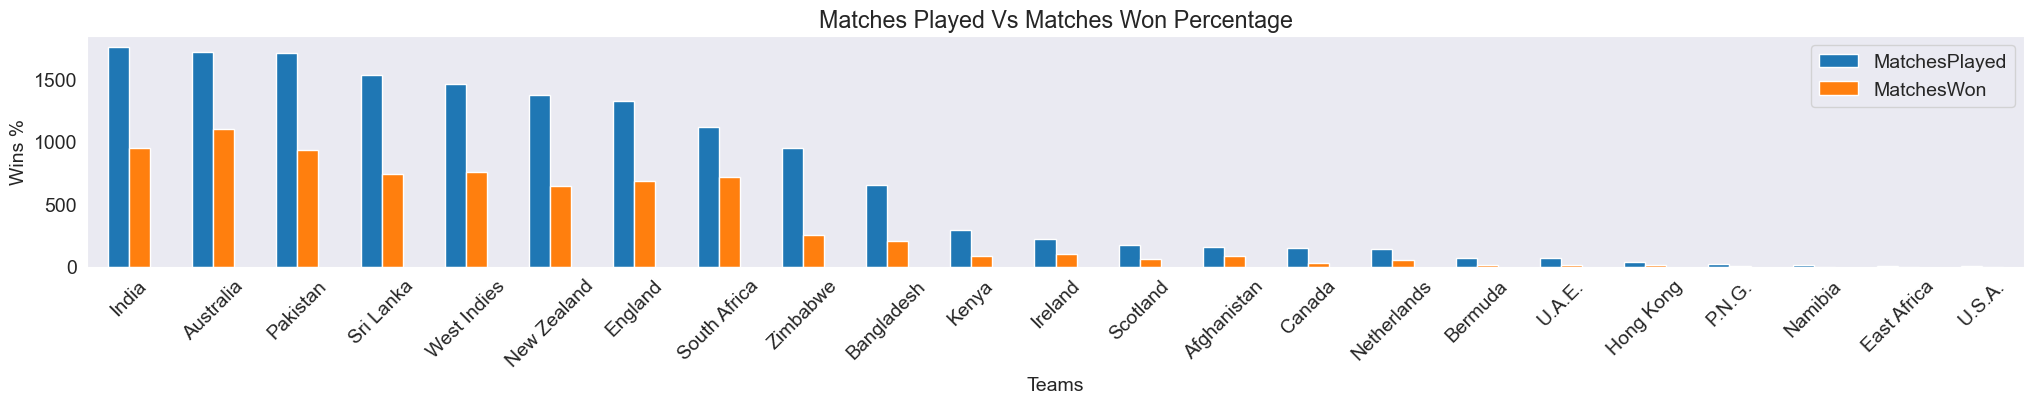

In [20]:
team_wise_matches_info.iloc[:,0:3].plot(kind="bar",x="TeamName",figsize=(25,3))
plt.xticks(rotation=45)
plt.xlabel("Teams")
plt.ylabel("Wins %")
plt.title("Matches Played Vs Matches Won Percentage")
plt.grid()
plt.show()

Text(0.5, 1.0, 'Matches Won Percentage')

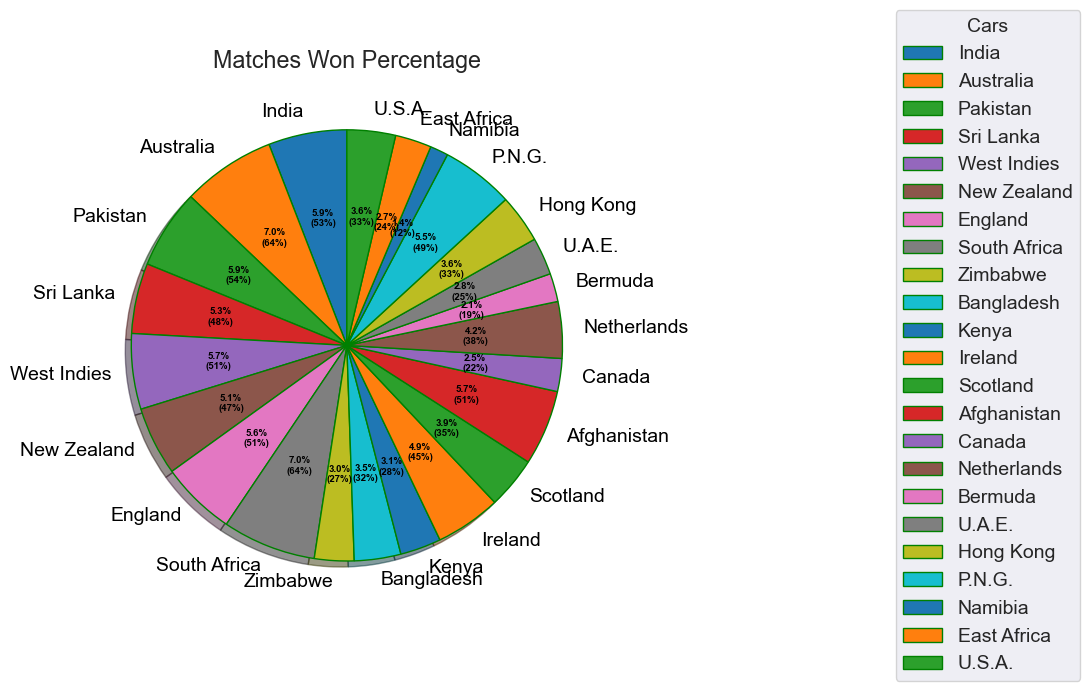

In [21]:
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d}%)".format(pct, absolute)

explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0) 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 

fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(team_wise_matches_info["WonPercentage"],autopct = lambda pct: func(pct, team_wise_matches_info["WonPercentage"]),labels = team_wise_matches_info["TeamName"],shadow = True,startangle = 90,wedgeprops = wp, textprops = dict(color ="black"))

ax.legend(wedges, team_wise_matches_info["TeamName"],title ="Cars",loc ="center left", bbox_to_anchor =(1.5, 0, 0.5, 1)) 

plt.setp(autotexts, size = 7, weight ="bold") 
ax.set_title("Matches Won Percentage") 

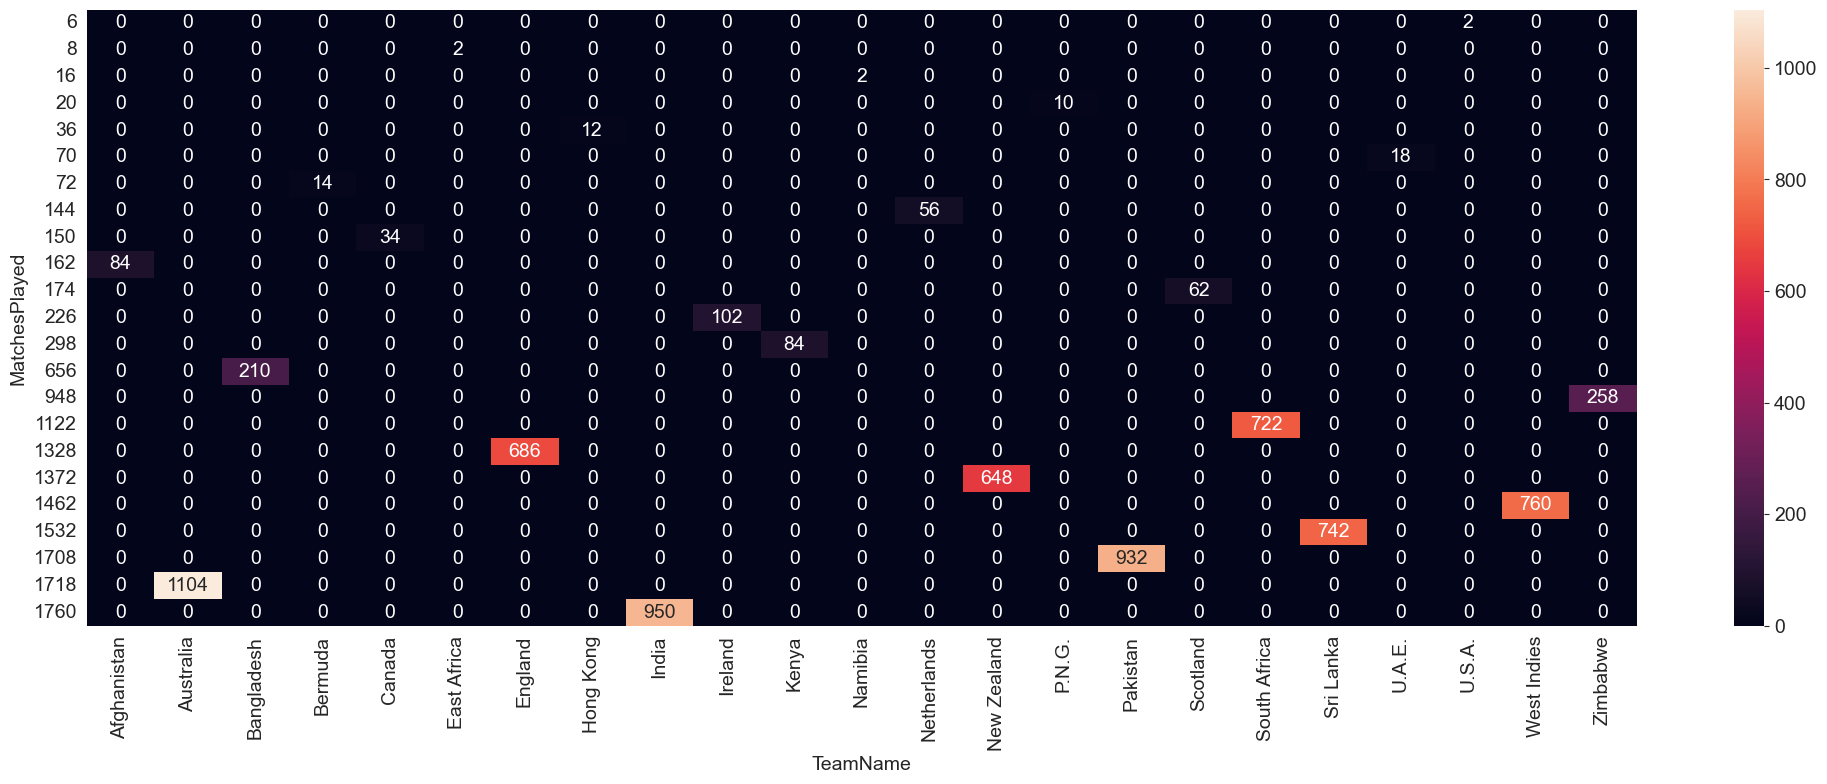

In [22]:
team_wise_matches_info_won_details  = pd.pivot_table(team_wise_matches_info,index=["MatchesPlayed"],columns="TeamName",values="MatchesWon",fill_value=0,aggfunc=sum)
plt.figure(figsize=(25,8))
sns.heatmap(team_wise_matches_info_won_details,annot=True,fmt=".0f")
plt.show()

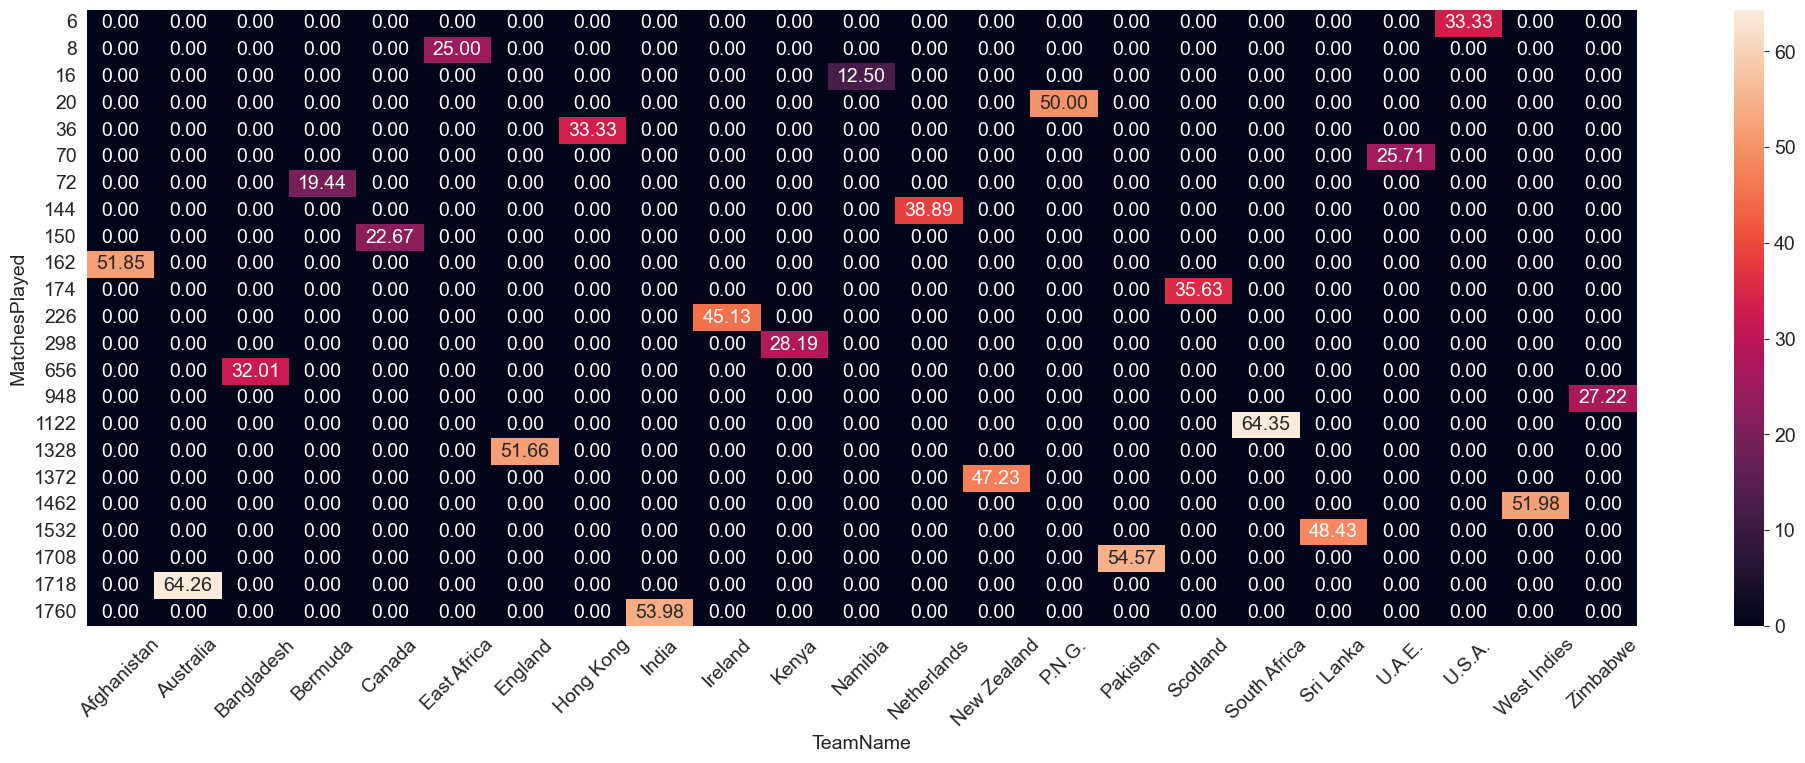

In [23]:
team_wise_matches_info_won_details  = pd.pivot_table(team_wise_matches_info,index=["MatchesPlayed"],columns="TeamName",values="WonPercentage",fill_value=0,aggfunc=sum)
plt.figure(figsize=(25,8))
sns.heatmap(team_wise_matches_info_won_details,annot=True,fmt="1.02f")
plt.xticks(rotation=45)
plt.show()

In [25]:
ground_wise_team_won_data = matches_raw_df[matches_raw_df["Host_Country"] == "India"].pivot_table(index="Ground",columns="Winner",values="Scorecard",fill_value=0,aggfunc="count")
ground_wise_team_won_data

Winner,Afghanistan,Australia,Bangladesh,Canada,East Africa,England,India,Ireland,Kenya,Namibia,New Zealand,Pakistan,South Africa,Sri Lanka,U.S.A.,West Indies,Zimbabwe
Ground,,,,,,,,,,,,,,,,,
Ahmedabad,0,6,0,0,0,4,14,0,0,0,4,2,4,4,0,10,0
Amritsar,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0
Bengaluru,0,8,0,0,0,4,26,2,0,0,0,2,0,0,0,0,0
Chandigarh,0,2,0,0,0,2,6,0,0,0,0,0,0,0,0,0,0
Chennai,0,8,0,0,0,4,14,0,2,0,2,4,0,0,0,2,0
Cuttack,0,2,0,0,0,6,24,0,0,0,2,0,0,2,0,0,0
Delhi,0,4,0,2,0,4,24,0,0,0,2,2,2,2,0,4,0
Dharamsala,0,0,0,0,0,2,4,0,0,0,0,0,0,0,0,0,0
Faridabad,0,2,0,0,0,0,4,0,0,0,0,0,4,0,0,4,2


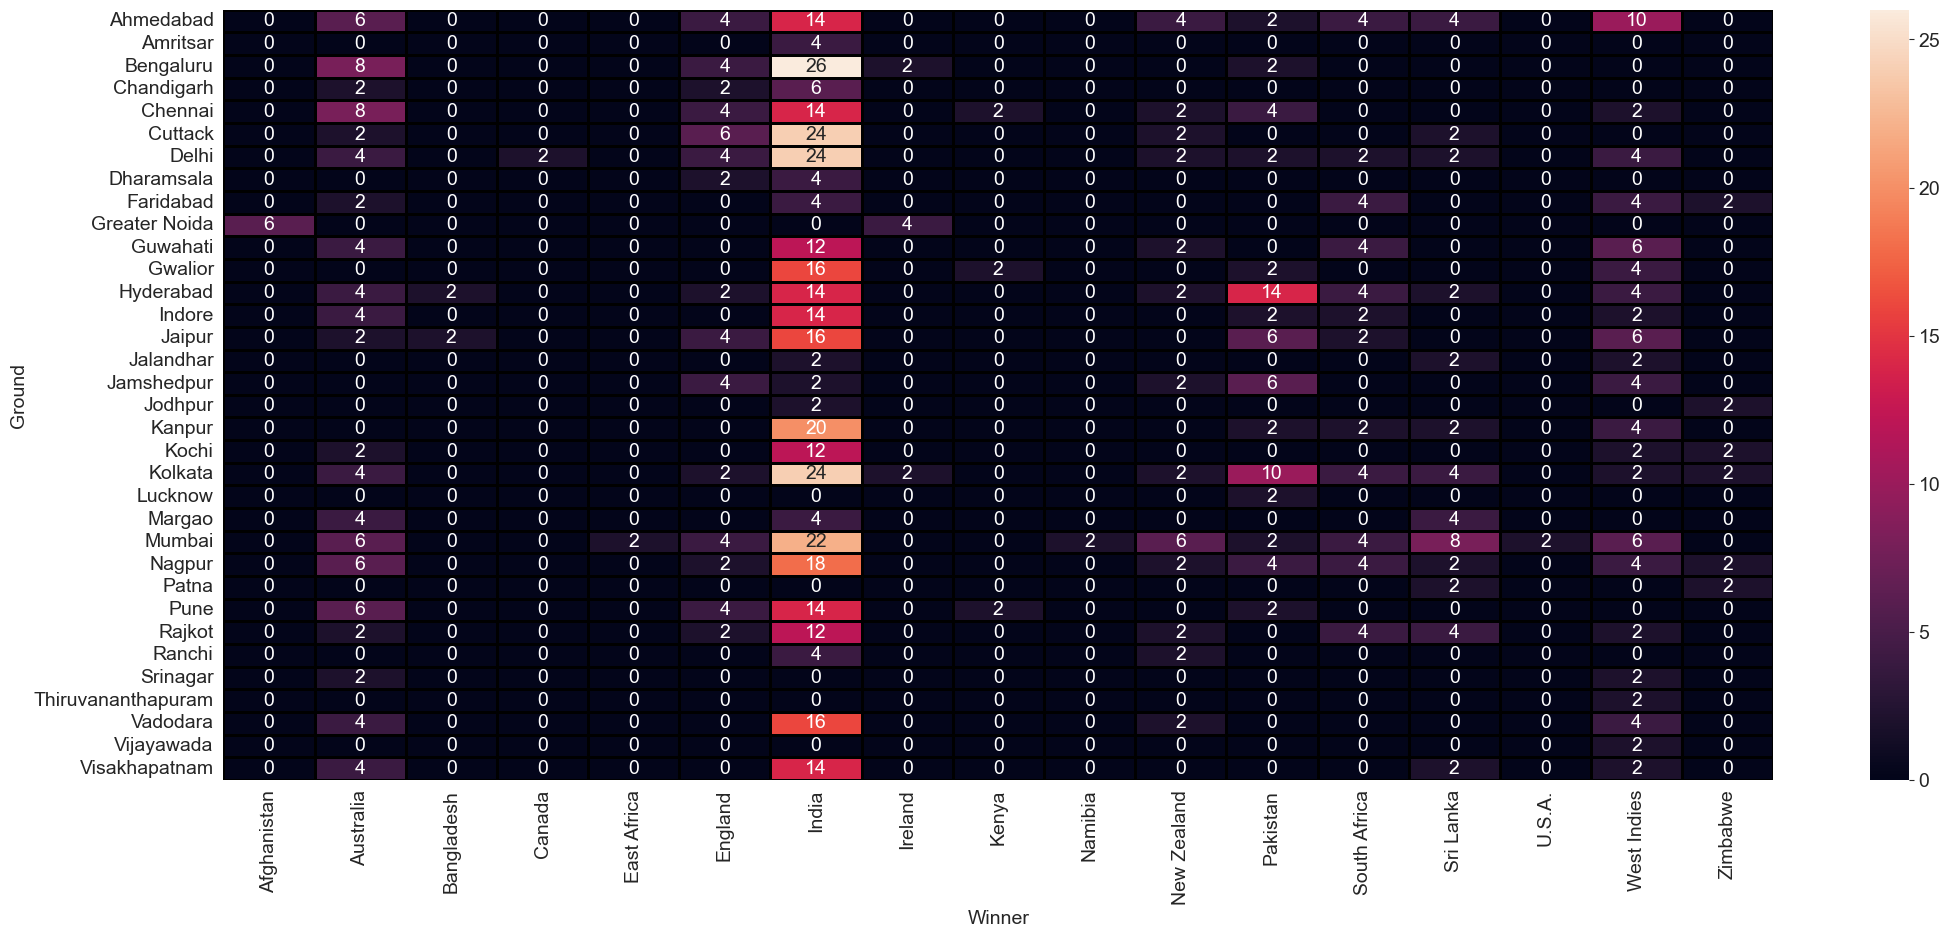

In [26]:
plt.figure(figsize=(25,10))
sns.heatmap(ground_wise_team_won_data,linecolor='black',linewidth=1,annot=True, fmt=".0f")
plt.show()

In [28]:
ground_wise_team_won_data = matches_raw_df.pivot_table(index="Ground",columns="Winner",values="Scorecard",fill_value=0,aggfunc="count")
ground_wise_team_won_data

Winner,Afghanistan,Australia,Bangladesh,Bermuda,Canada,East Africa,England,Hong Kong,India,Ireland,...,New Zealand,P.N.G.,Pakistan,Scotland,South Africa,Sri Lanka,U.A.E.,U.S.A.,West Indies,Zimbabwe
Ground,,,,,,,,,,,,,,,,,,,,,
Aberdeen,0,0,0,0,2,0,2,0,0,2,...,4,0,0,12,0,0,0,0,0,0
Abu Dhabi,0,6,0,0,0,0,6,2,2,0,...,8,2,32,2,6,4,4,0,0,0
Adelaide,0,68,2,0,0,0,8,0,16,0,...,18,0,8,0,8,10,0,0,22,0
Ahmedabad,0,6,0,0,0,0,4,0,14,0,...,4,0,2,0,4,4,0,0,10,0
Albion,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vijayawada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
Visakhapatnam,0,4,0,0,0,0,0,0,14,0,...,0,0,0,0,0,2,0,0,2,0
Wellington,0,16,0,0,0,0,2,0,6,0,...,52,0,8,0,6,8,0,0,4,0


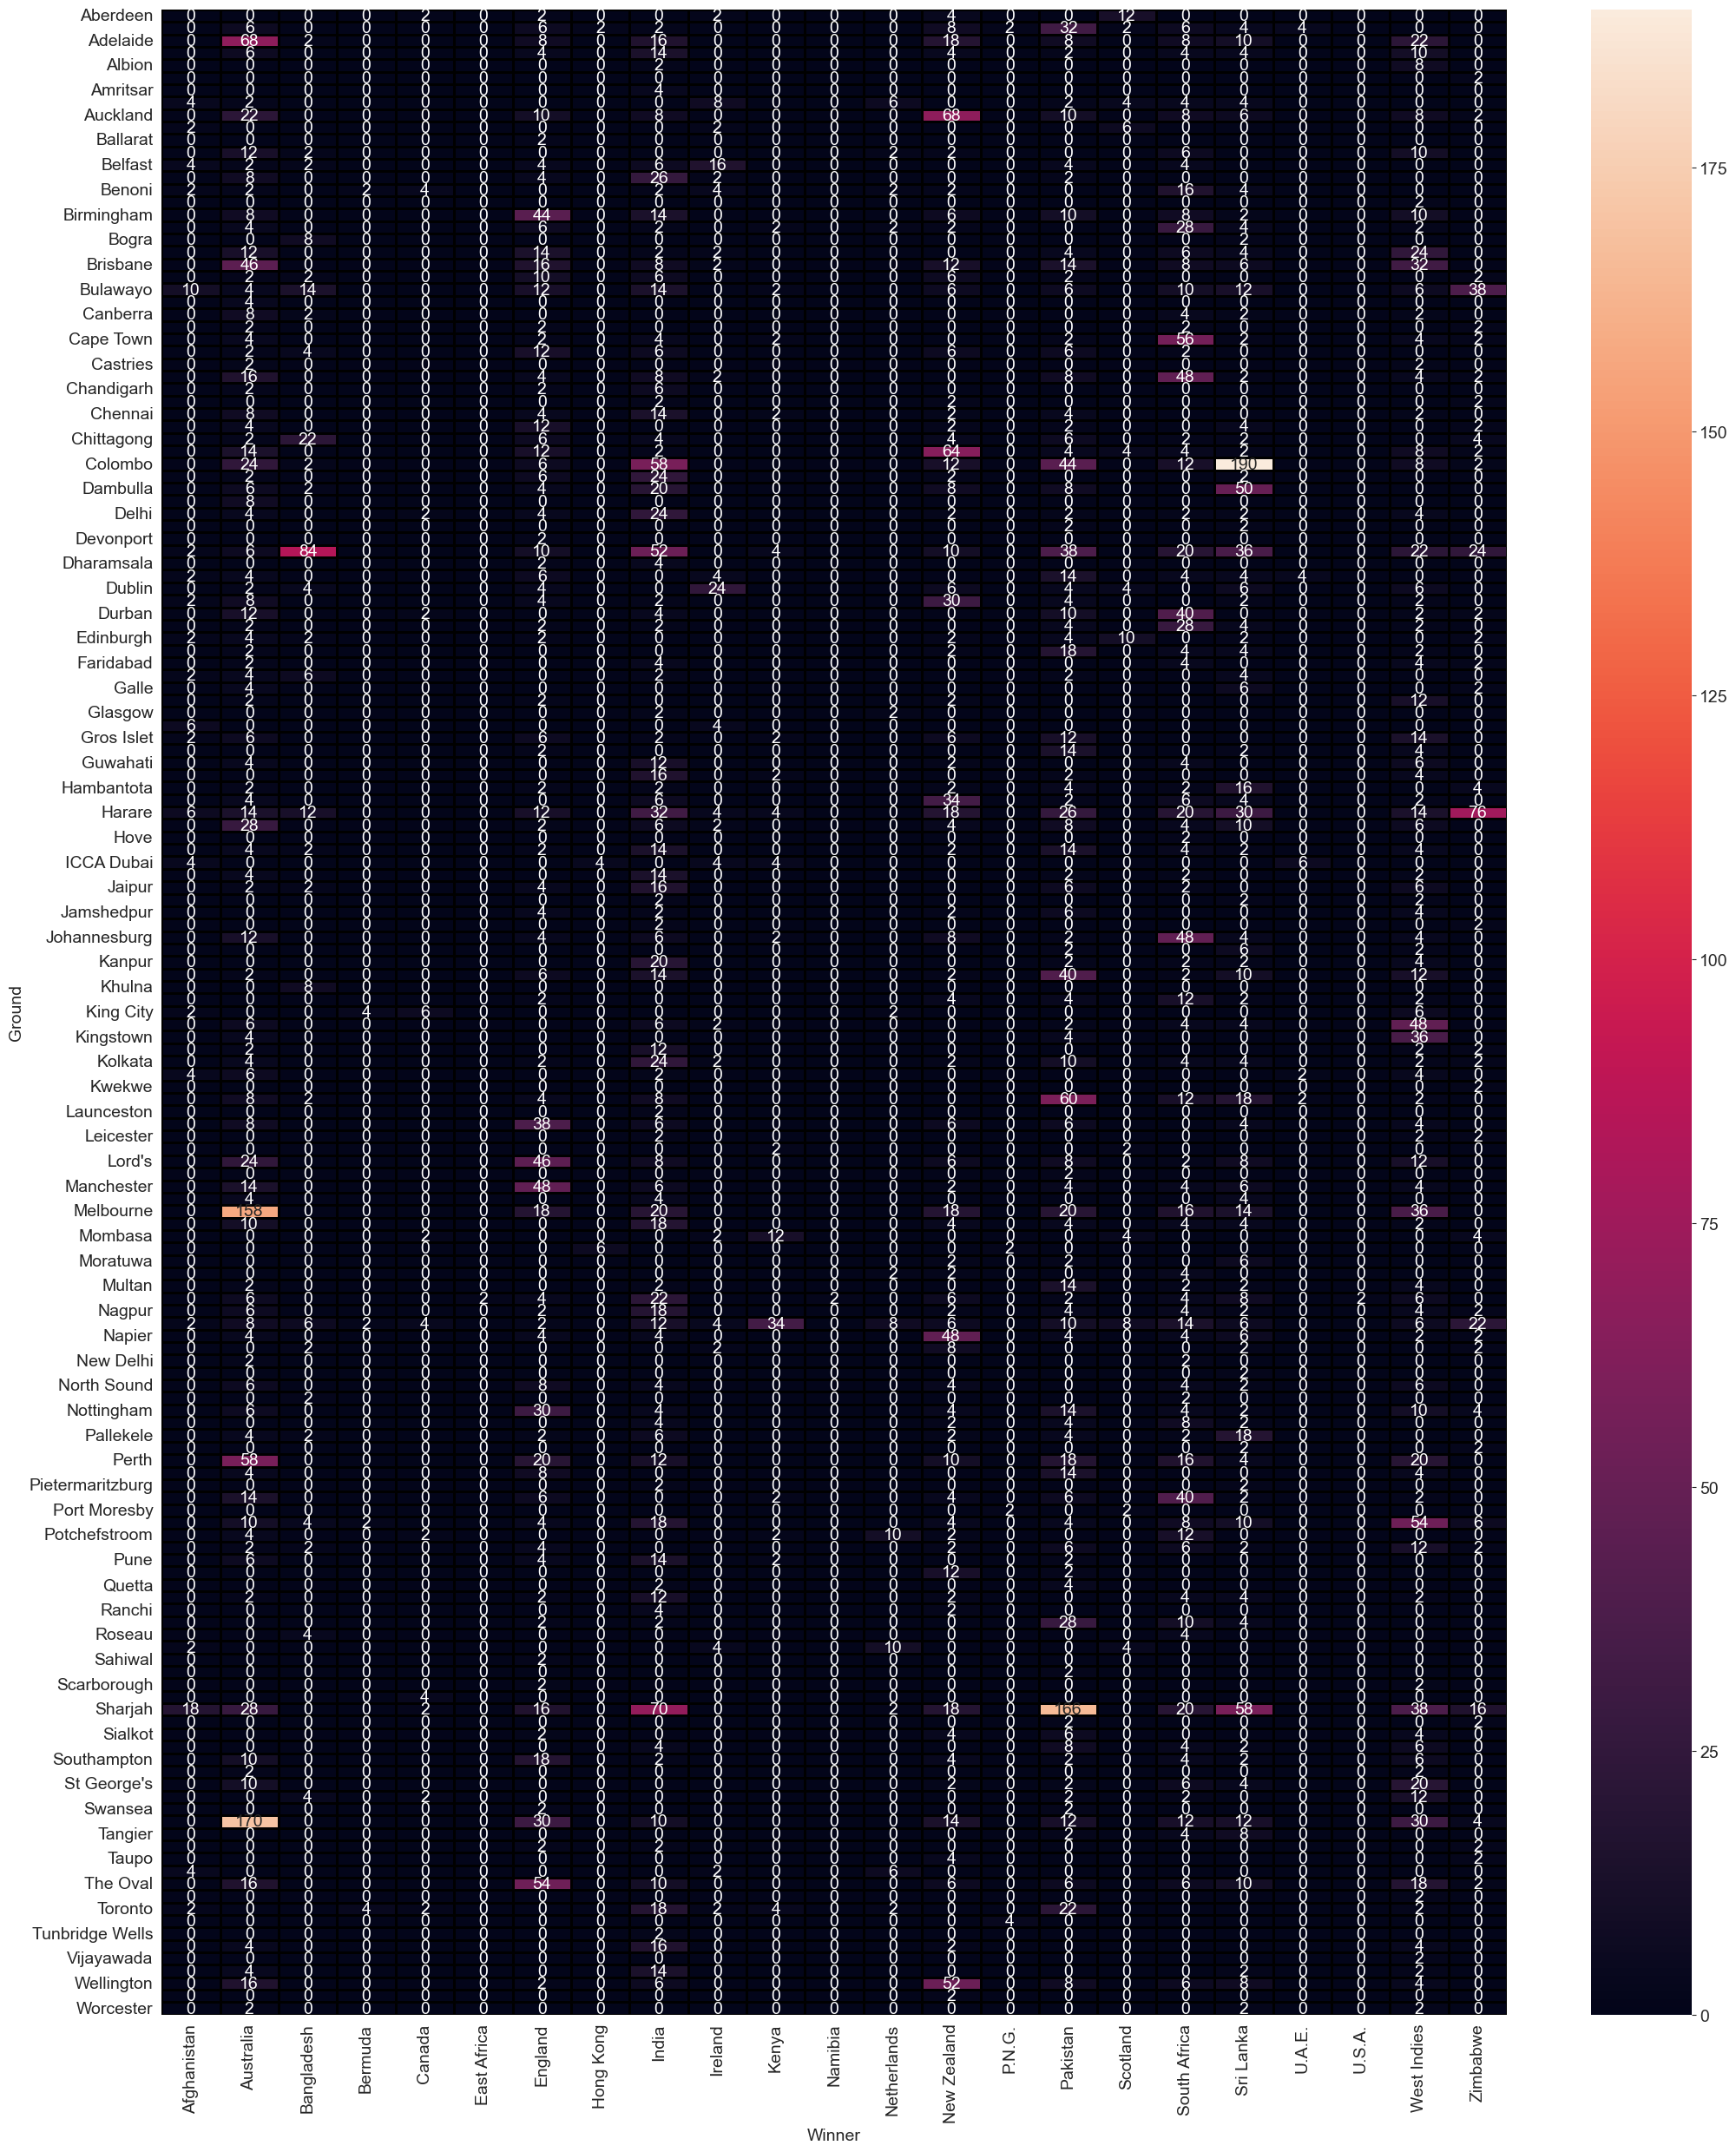

In [29]:
plt.figure(figsize=(25,30))
sns.heatmap(ground_wise_team_won_data,linecolor='black',linewidth=1,annot=True, fmt=".0f")
plt.show()

In [30]:
team_wise_matches_info.head()

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
5,India,1760,950,53.98,46.02,590,358,60.68,78,101,78,101,1170,592,50.6,132,164,132,164
0,Australia,1718,1104,64.26,35.74,818,548,66.99,159,115,159,115,900,556,61.78,150,128,150,128
4,Pakistan,1708,932,54.57,45.43,330,202,61.21,49,52,49,52,1378,730,52.98,202,163,202,163
6,Sri Lanka,1532,742,48.43,51.57,422,274,64.93,63,74,63,74,1110,468,42.16,128,106,128,106
3,West Indies,1462,760,51.98,48.02,460,258,56.09,50,79,50,79,1002,502,50.1,116,135,116,135


In [31]:
team_wise_matches_info.sort_values("MatchesPlayed",ascending=False).head(1)

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
5,India,1760,950,53.98,46.02,590,358,60.68,78,101,78,101,1170,592,50.6,132,164,132,164


In [32]:
team_wise_matches_info.sort_values("MatchesWon",ascending=False).head(1)

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
0,Australia,1718,1104,64.26,35.74,818,548,66.99,159,115,159,115,900,556,61.78,150,128,150,128


In [33]:
team_wise_matches_info.sort_values("WonPercentage",ascending=False).head(1)

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
8,South Africa,1122,722,64.35,35.65,458,336,73.36,86,82,86,82,664,386,58.13,101,92,101,92


In [34]:
team_wise_matches_info.sort_values("Total_Home_Played",ascending=False).head(1)

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
0,Australia,1718,1104,64.26,35.74,818,548,66.99,159,115,159,115,900,556,61.78,150,128,150,128


In [36]:
team_wise_matches_info.sort_values("Home_Wins%",ascending=False).head(1)

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
19,Hong Kong,36,12,33.33,66.67,8,6,75.0,2,1,2,1,28,6,21.43,2,1,2,1


In [37]:
team_wise_matches_info.sort_values("Total_Away_Played",ascending=False).head(1)

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
4,Pakistan,1708,932,54.57,45.43,330,202,61.21,49,52,49,52,1378,730,52.98,202,163,202,163


In [38]:
team_wise_matches_info.sort_values("Away_Wins%",ascending=False).head(1)

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
0,Australia,1718,1104,64.26,35.74,818,548,66.99,159,115,159,115,900,556,61.78,150,128,150,128


In [39]:
matches_raw_df = team_wise_matches_info

In [55]:
from sklearn.model_selection import train_test_split
from sklearn import metrics, tree
from sklearn.metrics import classification_report,confusion_matrix

matches_raw_df.TeamName = pd.Categorical(matches_raw_df.TeamName)
matches_raw_df["TeamName"] = matches_raw_df.TeamName.cat.codes

matches_raw_df

,TeamName,MatchesPlayed,MatchesWon,WonPercentage,LossPercentage,Total_Home_Played,Total_Home_Wins,Home_Wins%,Home_Innings_1st_1st,Home_Innings_1st_2nd,Home_Innings_2nd_1st,Home_Innings_2nd_2nd,Total_Away_Played,Total_Away_Wins,Away_Wins%,Away_Innings_1st_1st,Away_Innings_1st_2nd,Away_Innings_2nd_1st,Away_Innings_2nd_2nd
5,8,1760,950,53.98,46.02,590,358,60.68,78,101,78,101,1170,592,50.6,132,164,132,164
0,1,1718,1104,64.26,35.74,818,548,66.99,159,115,159,115,900,556,61.78,150,128,150,128
4,15,1708,932,54.57,45.43,330,202,61.21,49,52,49,52,1378,730,52.98,202,163,202,163
6,18,1532,742,48.43,51.57,422,274,64.93,63,74,63,74,1110,468,42.16,128,106,128,106
3,21,1462,760,51.98,48.02,460,258,56.09,50,79,50,79,1002,502,50.1,116,135,116,135
2,13,1372,648,47.23,52.77,542,324,59.78,74,88,74,88,830,324,39.04,88,74,88,74
1,6,1328,686,51.66,48.34,540,320,59.26,65,95,65,95,788,366,46.45,86,97,86,97
8,17,1122,722,64.35,35.65,458,336,73.36,86,82,86,82,664,386,58.13,101,92,101,92
7,22,948,258,27.22,72.78,378,116,30.69,23,35,23,35,570,142,24.91,39,32,39,32
11,2,656,210,32.01,67.99,312,128,41.03,29,35,29,35,344,82,23.84,19,22,19,22


In [42]:
pred_columns = matches_raw_df[:]
prediction_var = pred_columns.columns
print(list(prediction_var))

['TeamName', 'MatchesPlayed', 'MatchesWon', 'WonPercentage', 'LossPercentage', 'Total_Home_Played', 'Total_Home_Wins', 'Home_Wins%', 'Home_Innings_1st_1st', 'Home_Innings_1st_2nd', 'Home_Innings_2nd_1st', 'Home_Innings_2nd_2nd', 'Total_Away_Played', 'Total_Away_Wins', 'Away_Wins%', 'Away_Innings_1st_1st', 'Away_Innings_1st_2nd', 'Away_Innings_2nd_1st', 'Away_Innings_2nd_2nd']


In [44]:
train,test = train_test_split(matches_raw_df,test_size=0.2)
print(train.shape)
print(test.shape)

(18, 19)
(5, 19)


In [45]:
train_X = train[prediction_var]
train_Y = train["TeamName"]
print(list(train.columns))

test_X = train[prediction_var]
test_Y = train["TeamName"]

['TeamName', 'MatchesPlayed', 'MatchesWon', 'WonPercentage', 'LossPercentage', 'Total_Home_Played', 'Total_Home_Wins', 'Home_Wins%', 'Home_Innings_1st_1st', 'Home_Innings_1st_2nd', 'Home_Innings_2nd_1st', 'Home_Innings_2nd_2nd', 'Total_Away_Played', 'Total_Away_Wins', 'Away_Wins%', 'Away_Innings_1st_1st', 'Away_Innings_1st_2nd', 'Away_Innings_2nd_1st', 'Away_Innings_2nd_2nd']


In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

gnb = GaussianNB()
y_pred_gnb = gnb.fit(train_X,train_Y).predict(test_X)

In [57]:
cnf_matrix_gnb = metrics.confusion_matrix(test_Y,y_pred_gnb)
print(cnf_matrix_gnb)
print(classification_report(test_Y,y_pred_gnb))

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           7       1.00   

In [64]:
print(metrics.accuracy_score(test_Y,y_pred_gnb))

1.0


In [73]:
model = RandomForestClassifier(n_estimators=5)
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print(round(metrics.accuracy_score(test_Y,prediction),2))
print(classification_report(test_Y,prediction))

0.89
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         1
          11       0.50      1.00      0.67         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         1
          20       0.00      0.00      0.00         1
          21       1.0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
label_df = pd.read_csv("E:\ODI_Cricket_dataset\ODI_Cricket_dataset\LabelledDataset.csv")

In [52]:
label_df.head()

,Team 1_Afghanistan,Team 1_Australia,Team 1_Bangladesh,Team 1_Bermuda,Team 1_Canada,Team 1_East Africa,Team 1_England,Team 1_Hong Kong,Team 1_India,Team 1_Ireland,...,Innings_Team1_Second,Innings_Team2_First,Innings_Team2_Second,Venue_Team1_Away,Venue_Team1_Home,Venue_Team1_Neutral,Venue_Team2_Away,Venue_Team2_Home,Venue_Team2_Neutral,Winner
0,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,Australia
1,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,1,0,0,England
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,Australia
3,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,1,0,0,England
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,New Zealand
